### Ref Funcs

In [ ]:
def print_dict(d, depth=0, _space=0, with_value=False,
               only_first_sample=False,
               only_key: str = None, only_key_ind: int = None
               ):
    
    r""""
    Args:
        - depth: Print all nested dictionaries upto a specific depth
        - _space: Space to leave for a certain depth dictionary items
        - with_value: Print values if at the final depth
        - only_first_sample: Only print the first key (and value) of the dictionary
        - only_key: Only print the given key info
        - only_key_ind: Only print the key info corresponding to the given key index
    """

    assert isinstance(d, dict), "Provided Input is not a Dictionary!"

    if only_key is not None: print_dict(d[key], depth, _space, with_value, only_first_sample)
    
    elif only_key_ind is not None: 
        keys_list = list(d.keys())
        key = keys_list[only_key_ind]
        print_dict(d[key], depth, _space, with_value, only_first_sample)

    else:
        for count, key in enumerate(d):
            
            print_text = " "*_space + f" - {key}"
            if not isinstance(d[key], dict) and with_value: print_text += f": {d[key]}"
            print(print_text)
            
            if depth>0: 
                if not isinstance(d[key], dict): continue
                print_dict(d[key], depth-1, _space+3, with_value)

            if only_first_sample: return

In [35]:
def train_time(iter_per_s, 
               num_samples = 30462,
               batch_size = 8,
               num_epochs=150):
    
    num_iters = num_samples // batch_size
    print(f"Num Iters: {num_iters}")

    one_iter = 1/iter_per_s
    one_epoch = one_iter * num_iters
    one_exp = one_epoch * num_epochs

    print(f"Time for \n - One Epoch: {round(one_epoch / 60, 3)} mins \n - One Exp: {round(one_exp / (60), 3)} mins / {round(one_exp / (60 * 60), 3)} hours / {round(one_exp / (60 * 60 * 24), 3)} days")

#train_time(iter_per_s = 10, num_samples=10000, num_epochs=1, batch_size=1)
# train_time(iter_per_s = 3.9, num_samples=2500)
# train_time(iter_per_s = 4.2, num_samples=2500)
train_time(iter_per_s = 3.5, num_samples=2500, num_epochs=100)

Num Iters: 312
Time for 
 - One Epoch: 1.486 mins 
 - One Exp: 148.571 mins / 2.476 hours / 0.103 days


In [5]:
from math import floor

def conv_out_size(W, K, P, S):

    return floor((W-K+2*P)/S) + 1

conv_out_size(W = 119,
              K = 6,
              P = 6//2,
              S=1)

120

### Download LIP Dataset

In [ ]:
import kagglehub

# path = kagglehub.dataset_download("roneoz/lip-dataset")
# path

/mnt/anaconda3/envs/schp_mod/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import os

check_path = "data/"

check_dirs = ["train_images", "train_segmentations", "val_images", "val_segmentations"]
for d in check_dirs:
    dir_path = os.path.join(check_path, d)

    print(f"Num Files in {d}: {len(os.listdir(dir_path))}")

print("\n")

check_txts = ["train_id.txt", "val_id.txt"]
for t in check_txts:

    txt_path = os.path.join(check_path, t)

    with open(txt_path, "r") as f:
        txt_data = f.readlines()

    print(f"Num Image IDs in {txt_path}: {len(txt_data)}")

Num Files in train_images: 30462
Num Files in train_segmentations: 30462
Num Files in val_images: 10000
Num Files in val_segmentations: 10000


Num Image IDs in data/train_id.txt: 30462
Num Image IDs in data/val_id.txt: 10000


### Rough

In [38]:
import numpy as np

In [47]:
def get_palette(num_cls):
    """ Returns the color map for visualizing the segmentation mask.
    Args:
        num_cls: Number of classes
    Returns:
        The color map
    """
    n = num_cls
    palette = [0] * (n * 3)
    for j in range(0, n):
        lab = j
        palette[j * 3 + 0] = 0
        palette[j * 3 + 1] = 0
        palette[j * 3 + 2] = 0
        i = 0
        while lab:
            palette[j * 3 + 0] |= (((lab >> 0) & 1) << (7 - i))
            palette[j * 3 + 1] |= (((lab >> 1) & 1) << (7 - i))
            palette[j * 3 + 2] |= (((lab >> 2) & 1) << (7 - i))
            i += 1
            lab >>= 3
    return palette


num_cls = 2
palette = get_palette(num_cls)
arr = np.array([palette[k:k+3] for k in np.arange(0, num_cls*3, 3)])
arr

array([[  0,   0,   0],
       [128,   0,   0]])

In [31]:
lab = 1
k = 0
k_final = 3

print(lab >> k)
print(lab << k)
print(lab >>= k_final)

SyntaxError: invalid syntax (1603382187.py, line 7)

In [26]:
lab << 0

3

### Freezing SCHP Modules

In [1]:
import networks

model = networks.init_model("resnet101_multiscale", 
                                  num_classes=20, 
                                  pretrained='./pretrain_model/resnet101-imagenet.pth')

/mnt/anaconda3/envs/schp_mod/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
modules = {}

for count, i in enumerate(model.named_modules()):
    # print(f"\n\n {count} : {i} \n\n")

    modules[i[0]] = i[1]

In [6]:
print_dict(modules, with_value=False)

 - 
 - conv1
 - bn1
 - relu1
 - conv2
 - bn2
 - relu2
 - conv3
 - bn3
 - relu3
 - maxpool
 - layer1
 - layer1.0
 - layer1.0.conv1
 - layer1.0.bn1
 - layer1.0.conv2
 - layer1.0.bn2
 - layer1.0.conv3
 - layer1.0.bn3
 - layer1.0.relu
 - layer1.0.relu_inplace
 - layer1.0.downsample
 - layer1.0.downsample.0
 - layer1.0.downsample.1
 - layer1.1
 - layer1.1.conv1
 - layer1.1.bn1
 - layer1.1.conv2
 - layer1.1.bn2
 - layer1.1.conv3
 - layer1.1.bn3
 - layer1.1.relu
 - layer1.1.relu_inplace
 - layer1.2
 - layer1.2.conv1
 - layer1.2.bn1
 - layer1.2.conv2
 - layer1.2.bn2
 - layer1.2.conv3
 - layer1.2.bn3
 - layer1.2.relu
 - layer1.2.relu_inplace
 - layer2
 - layer2.0
 - layer2.0.conv1
 - layer2.0.bn1
 - layer2.0.conv2
 - layer2.0.bn2
 - layer2.0.conv3
 - layer2.0.bn3
 - layer2.0.relu
 - layer2.0.relu_inplace
 - layer2.0.downsample
 - layer2.0.downsample.0
 - layer2.0.downsample.1
 - layer2.1
 - layer2.1.conv1
 - layer2.1.bn1
 - layer2.1.conv2
 - layer2.1.bn2
 - layer2.1.conv3
 - layer2.1.bn3
 - lay

In [5]:
module = getattr(model, "fusion")

In [6]:
attrs = [a for a in dir(model) if a.__contains__("fusion")]
attrs

['fusion_edges', 'fusion_multi']

In [10]:
sum(p.numel() for p in model.fusion_edges.parameters())

37636

In [ ]:
for param in getattr(model, "fusion_edges").parameters:
    

Fusion_Conv_Attention(
  (sa): Sequential(
    (0): Conv2d(1024, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=4)
    (1): Sigmoid()
  )
  (ca): Sequential(
    (0): AdaptiveAvgPool2d(output_size=1)
    (1): Conv2d(1024, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(16, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (4): Sigmoid()
  )
  (prep_out): Sequential(
    (0): Conv2d(1024, 522, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): InPlaceABNSync(522, eps=1e-05, momentum=0.1, affine=True, activation=leaky_relu, slope=0.01)
    (2): Dropout2d(p=0.1, inplace=False)
    (3): Conv2d(522, 20, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [8]:
chkpt_path = "checkpoints/lip_copy.pth"

import torch
state_dict = torch.load(chkpt_path)["state_dict"]
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:]  # remove `module.`
    new_state_dict[name] = v
missing, unexpected = model.load_state_dict(new_state_dict, strict=False)

print("Missing keys (these are your new module’s params):")
print("\n".join(missing))
print("Unexpected keys (none, so long as you didn’t rename old ones):")
print("\n".join(unexpected))

Missing keys (these are your new module’s params):
check.check_conv.0.weight
check.check_conv.1.weight
check.check_conv.1.bias
check.check_conv.1.running_mean
check.check_conv.1.running_var
check.check_conv.2.weight
check.check_conv.3.weight
check.check_conv.3.bias
check.check_conv.3.running_mean
check.check_conv.3.running_var
Unexpected keys (none, so long as you didn’t rename old ones):



In [11]:
path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv/schp_stand_checkpoint.pth.tar"


import torch

d = torch.load(path)
d.keys()

dict_keys(['state_dict'])

In [9]:
d_new = {"state_dict": d["state_dict"]}
d_new.keys()

dict_keys(['state_dict'])

### LIP Dataset Modify

In [44]:
from datasets.datasets import LIPDataSet
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np

IMAGE_MEAN = [0.406, 0.456, 0.485]
IMAGE_STD = [0.225, 0.224, 0.229]

transform = transforms.Compose([
    transforms.ToTensor(),
    
    transforms.Normalize(mean=IMAGE_MEAN,
                            std=IMAGE_STD),
])
train_dataset = LIPDataSet('./data/LIP', 'train', crop_size=[473,473], 
                           transform=transform, num_samples=1)

In [36]:
def plot_sample(dataset, id):

    bgr_img = dataset[id][0].permute(1, 2, 0)
    rgb_img = bgr_img[:, :, [2, 1, 0]]

    seg_img = dataset[id][1]

    fig, ax = plt.subplots(1, 2, figsize=(15, 8))

    ax[0].imshow(rgb_img)
    ax[1].imshow(seg_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


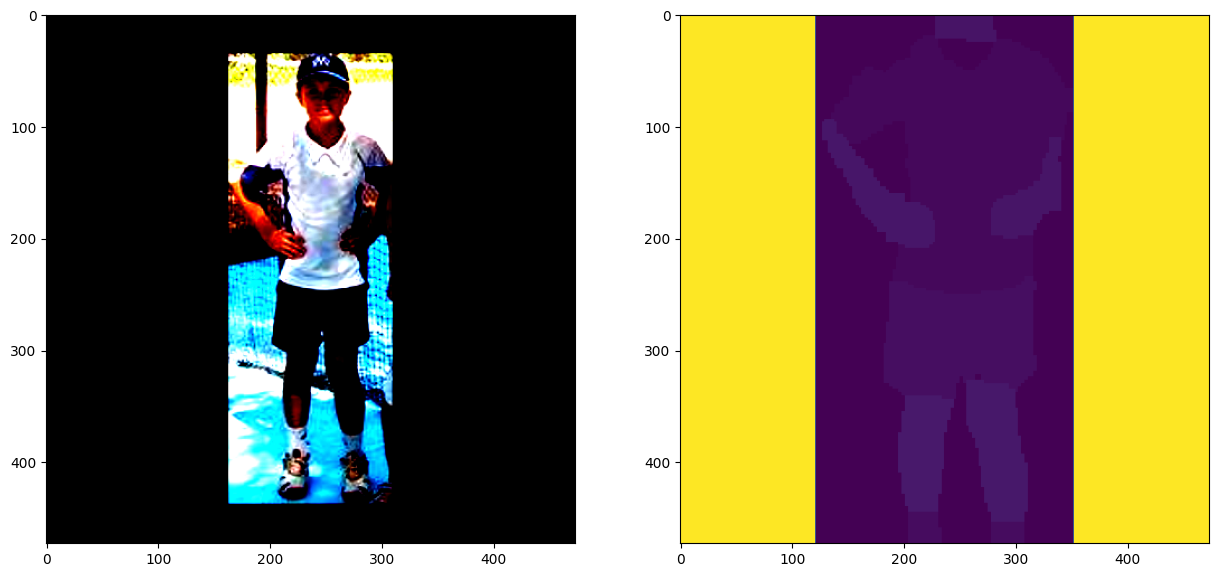

In [37]:
plot_sample(train_dataset, 0)

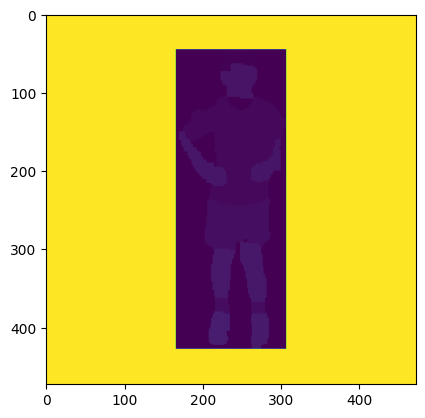

In [41]:
seg_img = train_dataset[0][1]

plt.imshow(seg_img)

In [45]:
seg_img_flat = seg_img.view(-1)
np.unique(seg_img_flat, return_counts=True)

(array([  0,   1,   5,   8,   9,  13,  14,  15,  16,  17,  18,  19, 255],
       dtype=uint8),
 array([ 28434,    892,  10323,    603,   4378,   1620,   1029,   1456,
          1884,   1477,    927,    980, 169726]))

In [ ]:
data_dir = "./data/LIP"



### Lite HRNet Setup

In [1]:
import mmcv
import mmpose

print(mmcv.__version__)
print(mmpose.__version__)

/mnt/anaconda3/envs/schp_lite/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.4.8
0.29.0


In [2]:
from networks.backbone.Lite_HRNET import LiteHRNet

# model settings
model_18_small_cfg = dict(
    type='TopDown',
    pretrained=None,
    backbone=dict(
        type='LiteHRNet',
        in_channels=3,
        extra=dict(
            stem=dict(stem_channels=32, out_channels=32, expand_ratio=1),
            num_stages=3,
            stages_spec=dict(
                num_modules=(2, 4, 2),                          #TODO Doubt: What do these mean
                num_branches=(2, 3, 4),                         #These correspond to the parallel multi-resolution branches. So, stage 1 has two parallel branches, stage 2 has three parallel branches, etc.
                num_blocks=(2, 2, 2),
                module_type=('LITE', 'LITE', 'LITE'),
                with_fuse=(True, True, True),
                reduce_ratios=(8, 8, 8),
                num_channels=(
                    (40, 80),
                    (40, 80, 160),
                    (40, 80, 160, 320),
                )),
            with_head=False,
        )))

model_30_large_cfg = dict(
    type='TopDown',
    pretrained=None,
    backbone=dict(
        type='LiteHRNet',
        in_channels=3,
        extra=dict(
            stem=dict(  
                stem_channels=32,
                out_channels=32,
                expand_ratio=1),
            num_stages=3,
            stages_spec=dict(
                num_modules=(3, 8, 3),
                num_branches=(2, 3, 4),
                num_blocks=(2, 2, 2),
                module_type=('LITE', 'LITE', 'LITE'),
                with_fuse=(True, True, True),
                reduce_ratios=(8, 8, 8),
                num_channels=(
                    (40, 80),
                    (40, 80, 160),
                    (40, 80, 160, 320),
                )),
            with_head=True,
            )))

model_30_small_cfg = dict(
            stem=dict(  
                stem_channels=32,
                out_channels=32,
                expand_ratio=1),
            num_stages=3,
            stages_spec=dict(
                num_modules=(3, 8, 3),
                num_branches=(2, 3, 4),
                num_blocks=(2, 2, 2),
                module_type=('LITE', 'LITE', 'LITE'),
                with_fuse=(True, True, True),
                reduce_ratios=(8, 8, 8),
                num_channels=(
                    (40, 80),
                    (40, 80, 160),
                    (40, 80, 160, 320),
                )),
            with_head=True,
            )

model_custom_cfg = dict(
    type='TopDown',
    pretrained=None,
    backbone=dict(
        type='LiteHRNet',
        in_channels=3,
        extra=dict(
            stem=dict(stem_channels=32, out_channels=32, expand_ratio=1),
            num_stages=3,
            stages_spec=dict(
                num_modules=(2, 4, 2),                          #TODO Doubt: What do these mean
                num_branches=(2, 3, 4),                         #These correspond to the parallel multi-resolution branches. So, stage 1 has two parallel branches, stage 2 has three parallel branches, etc.
                num_blocks=(2, 2, 2),
                module_type=('LITE', 'LITE', 'LITE'),
                with_fuse=(True, True, True),
                reduce_ratios=(8, 8, 8),
                num_channels=(
                    (128, 256),
                    (128, 256, 512),
                    (128, 256, 512, 1024),
                )),
            with_head=False,
        )))

# extra_cfg = model_18_small_cfg["backbone"]["extra"]
# extra_cfg = model_30_large_cfg["backbone"]["extra"]
extra_cfg = model_30_small_cfg
# extra_cfg = model_custom_cfg["backbone"]["extra"]




In [3]:
extra_cfg

{'stem': {'stem_channels': 32, 'out_channels': 32, 'expand_ratio': 1},
 'num_stages': 3,
 'stages_spec': {'num_modules': (3, 8, 3),
  'num_branches': (2, 3, 4),
  'num_blocks': (2, 2, 2),
  'module_type': ('LITE', 'LITE', 'LITE'),
  'with_fuse': (True, True, True),
  'reduce_ratios': (8, 8, 8),
  'num_channels': ((40, 80), (40, 80, 160), (40, 80, 160, 320))},
 'with_head': True}

In [4]:
model = LiteHRNet(extra = extra_cfg)

print(f"Trainable Params:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Trainable Params: 1763020


In [ ]:
## Load pretrained weights
import torch

path_weights = "checkpoints/litehrnet_30_coco_256x192.pth"

saved_state_dict = torch.load(path_weights)["state_dict"]
filt_state_dict = {}
for k in saved_state_dict:
    if k.split(".")[0] == "backbone":
        new_k = ".".join(k.split(".")[1:])
    else:
        new_k = k

    filt_state_dict[new_k] = saved_state_dict[k]

model.load_state_dict(filt_state_dict, strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['keypoint_head.final_layer.weight', 'keypoint_head.final_layer.bias'])

In [1]:
from networks.HRNet_SCHP import hrnet_schp_30_small

model = hrnet_schp_30_small(pretrained="./checkpoints/litehrnet_30_coco_256x192.pth")

Missing Keys: 73, Unexpected Keys: 2
Missing Keys: ['context_encoding.stages.0.1.weight', 'context_encoding.stages.0.2.weight', 'context_encoding.stages.0.2.bias', 'context_encoding.stages.0.2.running_mean', 'context_encoding.stages.0.2.running_var', 'context_encoding.stages.1.1.weight', 'context_encoding.stages.1.2.weight', 'context_encoding.stages.1.2.bias', 'context_encoding.stages.1.2.running_mean', 'context_encoding.stages.1.2.running_var', 'context_encoding.stages.2.1.weight', 'context_encoding.stages.2.2.weight', 'context_encoding.stages.2.2.bias', 'context_encoding.stages.2.2.running_mean', 'context_encoding.stages.2.2.running_var', 'context_encoding.stages.3.1.weight', 'context_encoding.stages.3.2.weight', 'context_encoding.stages.3.2.bias', 'context_encoding.stages.3.2.running_mean', 'context_encoding.stages.3.2.running_var', 'context_encoding.bottleneck.0.weight', 'context_encoding.bottleneck.1.weight', 'context_encoding.bottleneck.1.bias', 'context_encoding.bottleneck.1.run

In [5]:
from torch.utils import data
import torchvision.transforms as transforms
import torch.optim as optim

from datasets.datasets import LIPDataSet

IMAGE_MEAN = [0.406, 0.456, 0.485]
IMAGE_STD =  [0.225, 0.224, 0.229]

# Data Loader
print('BGR Transformation')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=IMAGE_MEAN,
                            std=IMAGE_STD),
])

data_dir = "./data/LIP"
input_size = [128,128]
num_samples = 2500
batch_size=8
gpus = [0]

train_dataset = LIPDataSet(data_dir, 'train', crop_size=input_size, 
                           transform=transform, num_samples=num_samples)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size * len(gpus),
                                num_workers=16, shuffle=True, pin_memory=True, drop_last=True)


learning_rate = 7e-3
momentum = 0.9
weight_decay = 5e-4

trainable = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(trainable, lr=learning_rate, momentum=momentum,
                            weight_decay=weight_decay)

BGR Transformation


In [6]:
from tqdm import tqdm

for epoch in range(5):
    track_loss = []

    model.train()
    for i_ter, batch in enumerate(tqdm(train_loader)):

        images, labels, _ = batch
        labels = labels.cuda(non_blocking=True)

        preds = model(images)


        break
    break


for pred in preds:
    print(pred.shape)


  0%|          | 0/312 [00:01<?, ?it/s]

torch.Size([8, 40, 32, 32])
torch.Size([8, 40, 16, 16])
torch.Size([8, 80, 8, 8])
torch.Size([8, 160, 4, 4])


In [21]:
for pred in preds:
    print(pred.shape)

torch.Size([8, 40, 32, 32])
torch.Size([8, 40, 16, 16])
torch.Size([8, 80, 8, 8])
torch.Size([8, 160, 4, 4])


### HRNet Setup

In [3]:
from networks.backbone.HRNet import *

model = hrnet32(pretrained=False)

In [1]:
from networks.HRNet_SCHP import hrnet_schp_32

model = hrnet_schp_32()

/mnt/anaconda3/envs/schp_lite/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
sum(p.numel() for p in model.parameters())

70373912

In [ ]:
from networks.backbone.hrnet_ocr_config import _C as cfg
from networks.backbone.HRNet_OCR import HighResolutionNet

yaml_path = "networks/backbone/hrnet_ocr_arch_config.yaml"

cfg.defrost()

cfg.merge_from_file(yaml_path)

cfg.freeze()

In [6]:
model = HighResolutionNet(cfg)

### SegFormer Setup

In [1]:
import mmcv
mmcv.__version__

/mnt/anaconda3/envs/schp_lite/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.4.8'

In [2]:
import torch
torch.__version__

'1.5.1+cu101'

In [3]:
import timm

timm.__version__

'0.3.2'

In [2]:
from networks.backbone.SegFormer import mit_b4

model_back = mit_b4()

back_params = sum(p.numel() for p in model_back.parameters())
print(f"Num of Backbone Params: {back_params}")

Num of Backbone Params: 60842688


In [4]:
from networks.backbone.segformer_utils.segformer_head import SegFormerHead

norm_cfg = dict(type='SyncBN', requires_grad=True)

model_head = SegFormerHead(
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        feature_strides=[4, 8, 16, 32],
        channels=128,
        dropout_ratio=0.1,
        num_classes=150,
        norm_cfg=norm_cfg,
        align_corners=False,
        decoder_params=dict(embed_dim=768)
)

head_params = sum(p.numel() for p in model_head.parameters())
print(f"Num of Backbone Params: {head_params}")

Num of Backbone Params: 3285036


In [5]:
print(f"Model Parameters: {back_params + head_params}")

Model Parameters: 64127724


#### Pre-Train Weights

In [1]:
import torch

/mnt/anaconda3/envs/schp_lite/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
weights_path = "./pretrain_model/mit_b4.pth"
saved_state_dict = torch.load(weights_path)
len(saved_state_dict)

834

In [6]:
sum(p.numel() for k, p in saved_state_dict.items())

61355688

In [4]:
saved_state_dict.keys()

odict_keys(['patch_embed1.proj.weight', 'patch_embed1.proj.bias', 'patch_embed1.norm.weight', 'patch_embed1.norm.bias', 'patch_embed2.proj.weight', 'patch_embed2.proj.bias', 'patch_embed2.norm.weight', 'patch_embed2.norm.bias', 'patch_embed3.proj.weight', 'patch_embed3.proj.bias', 'patch_embed3.norm.weight', 'patch_embed3.norm.bias', 'patch_embed4.proj.weight', 'patch_embed4.proj.bias', 'patch_embed4.norm.weight', 'patch_embed4.norm.bias', 'block1.0.norm1.weight', 'block1.0.norm1.bias', 'block1.0.attn.q.weight', 'block1.0.attn.q.bias', 'block1.0.attn.kv.weight', 'block1.0.attn.kv.bias', 'block1.0.attn.proj.weight', 'block1.0.attn.proj.bias', 'block1.0.attn.sr.weight', 'block1.0.attn.sr.bias', 'block1.0.attn.norm.weight', 'block1.0.attn.norm.bias', 'block1.0.norm2.weight', 'block1.0.norm2.bias', 'block1.0.mlp.fc1.weight', 'block1.0.mlp.fc1.bias', 'block1.0.mlp.dwconv.dwconv.weight', 'block1.0.mlp.dwconv.dwconv.bias', 'block1.0.mlp.fc2.weight', 'block1.0.mlp.fc2.bias', 'block1.1.norm1.we

In [8]:
model_back.load_state_dict(saved_state_dict, strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['head.weight', 'head.bias'])

In [9]:
from networks.SegFormer_SCHP import segformer_mit_b4

model = segformer_mit_b4(20, None)

In [10]:
sum(p.numel() for p in model.parameters())

61781260

In [ ]:
renamed_state_dict = {f"backbone.{k}":v for k,v in saved_state_dict.items() if not k.__contains__("head")}
incompatible, unexpected = model.load_state_dict(renamed_state_dict, strict=False)

incomp_modules = np.unique([p.split(".")[0] for p in incompatible])
unexp_modules = np.unique([p.split(".")[0] for p in unexpected])
print(f"Pre-Trained Weights not loaded for \n - Incompatile Modules : {incomp_modules}\n - Unexcepted Modules: {unexp_modules}")

Pre-Trained Weights not loaded for 
 - Incompatile Modules : ['edge' 'fusion' 'head']
 - Unexcepted Modules: []


In [20]:
incompatible[0].split(".")[0]

'head'

In [21]:
import numpy as np

incomp_modules

array(['edge', 'fusion', 'head'], dtype='<U6')

### Reading Eval Results

In [353]:
# path = "log/eval_results/hrnet_schp/naive/results.pt"
path = "log/eval_results/hrnet_schp/hrnet_48_fused/results.pt"

import torch
results = torch.load(path)
results

OrderedDict([('Background', 76.27990591782726),
             ('Hat', 32.741287243008195),
             ('Hair', 45.81842000878006),
             ('Glove', 11.583131286223622),
             ('Sunglasses', 5.8779257228548),
             ('Upper-clothes', 48.082257760983126),
             ('Dress', 9.8774878638978),
             ('Coat', 30.923861267730363),
             ('Socks', 21.993263515557572),
             ('Pants', 51.63739049504039),
             ('Jumpsuits', 8.611915105115713),
             ('Scarf', 0.0),
             ('Skirt', 1.82822668042319),
             ('Face', 57.410045505701504),
             ('Left-arm', 35.33246445053706),
             ('Right-arm', 38.42839120997162),
             ('Left-leg', 28.5540306853777),
             ('Right-leg', 27.721450179491402),
             ('Left-shoe', 18.626248651776447),
             ('Right-shoe', 19.415975297064346),
             ('Pixel accuracy', 74.1705153609052),
             ('Mean accuracy', 43.761412201400994),
        

### Plotting Loss

------

In [84]:
from networks.ResNeSt_SCHP import ResNeSt101, ResNeSt101_dilate_2, ResNeSt101_dilate_1
from networks.SegFormer_SCHP import segformer_mit_b4, segformer_b4_ce2p, segformer_b4_mixed

model = segformer_b4_mixed()
sum(p.numel() for p in model.parameters())


Pre-Trained weights loaded for Backbone!
Pre-Trained Weights not loaded for 
 - Incompatile Modules : ['context_encoding' 'edge' 'fusion' 'head']
 - Unexcepted Modules: []



74631436

--------

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import os

path = "/mnt/Self-Correction-Human-Parsing/log/schp_stand/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_cons_loss_01/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_cons_loss_03/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_cons_loss_1/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv_train/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_attn/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_attn_4_train/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_attn_1/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_multiscale/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_multiscale_train/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_opt_adamw/loss_per_epoch.txt"

# path = "/mnt/Self-Correction-Human-Parsing/log/schp_multiscale_blocks_3/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_mod/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv_blocks/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv_alt/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv_alt_edge3/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv_alt_blocks/loss_per_epoch.txt"

# path = "/mnt/Self-Correction-Human-Parsing/log/schp_multiscale_btw3/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_multiscale_btw3_multi/loss_per_epoch.txt"

#path = "/mnt/Self-Correction-Human-Parsing/log/hrnet_schp/naive/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/hrnet_schp/30_small/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/hrnet_schp/custom_up_linear/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/hrnet_schp/hrnet_48/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/hrnet_schp/hrnet_48_fused/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/hrnet_schp/hrnet_48_top/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/hrnet_schp/hrnet_48_ocr/loss_per_epoch.txt"

#path = "/mnt/Self-Correction-Human-Parsing/log/resnest/resnest_101/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/resnest/resnest_101_dilate_2/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/resnest/resnest_101_dilate_1/loss_per_epoch.txt"

#path = "/mnt/Self-Correction-Human-Parsing/log/segformer/mit_b4/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/segformer/b4_ce2p/loss_per_epoch.txt"
path = "/mnt/Self-Correction-Human-Parsing/log/segformer/b4_mixed/loss_per_epoch.txt"

with open(path, "r") as f:
    data = f.readlines()

data = np.array([[float(elem) for elem in row.strip().split(",")] for row in data])#[:157]
data.shape

(148, 5)

In [86]:
# data[:6]

In [87]:
data[:, 4] = np.nan_to_num(data[:, 4], nan=0.0)
data[:, 1] = data[:, [2, 3, 4]].sum(axis=1)
# data

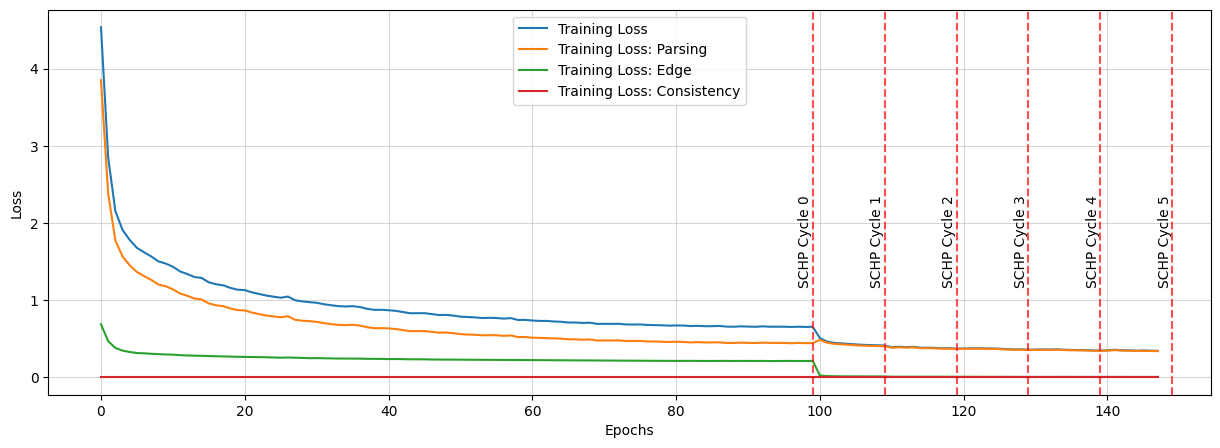

Total Loss at epoch 148: 0.3421841417439282


In [88]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

#data = data[:77]

#data = np.nan_to_num(data, nan=0.0)


ax.plot(data[:, 0], data[:, 1], label="Training Loss")
ax.plot(data[:, 0], data[:, 2], label="Training Loss: Parsing")
ax.plot(data[:, 0], data[:, 3], label="Training Loss: Edge")
ax.plot(data[:, 0], data[:, 4], label="Training Loss: Consistency")

num_cycles = 6
schp_start_cycle = 99
epochs_per_cycle = 10
schp_end_cycle = schp_start_cycle + num_cycles * epochs_per_cycle
for count, line_x in enumerate(np.arange(schp_start_cycle, schp_end_cycle, epochs_per_cycle)):

    ax.axvline(line_x, linestyle="dashed", alpha=0.7, color="red")
    ax.text(line_x-2, 1.2, f"SCHP Cycle {count}", rotation=90)

plt.grid(True, alpha=0.5)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

print(f"Total Loss at epoch {len(data)}: {data[-1, 1]}")

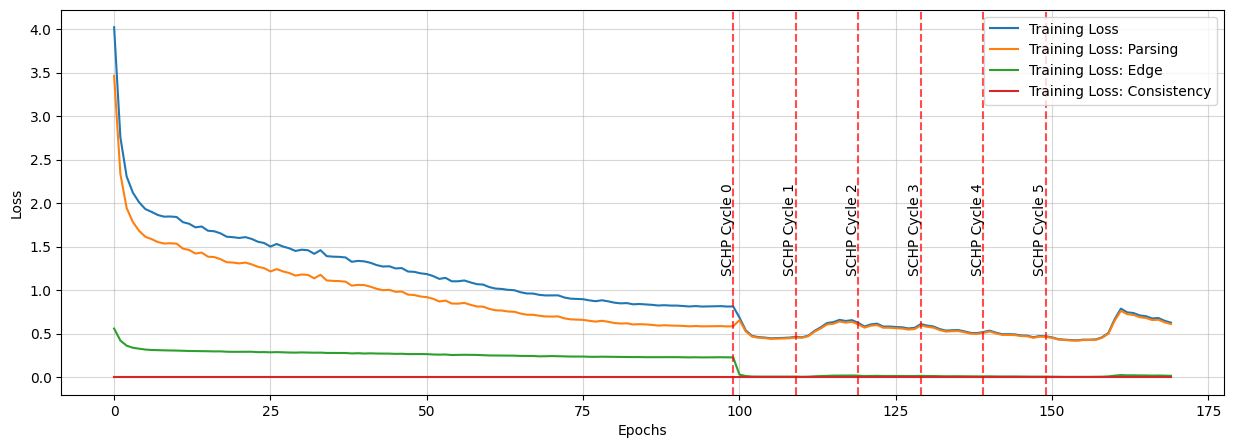

Total Loss at epoch 170: 0.6271910071372986


In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

#data = data[:77]

#data = np.nan_to_num(data, nan=0.0)


ax.plot(data[:, 0], data[:, 1], label="Training Loss")
ax.plot(data[:, 0], data[:, 2], label="Training Loss: Parsing")
ax.plot(data[:, 0], data[:, 3], label="Training Loss: Edge")
ax.plot(data[:, 0], data[:, 4], label="Training Loss: Consistency")

num_cycles = 6
schp_start_cycle = 99
epochs_per_cycle = 10
schp_end_cycle = schp_start_cycle + num_cycles * epochs_per_cycle
for count, line_x in enumerate(np.arange(schp_start_cycle, schp_end_cycle, epochs_per_cycle)):

    ax.axvline(line_x, linestyle="dashed", alpha=0.7, color="red")
    ax.text(line_x-2, 1.2, f"SCHP Cycle {count}", rotation=90)

plt.grid(True, alpha=0.5)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

print(f"Total Loss at epoch {len(data)}: {data[-1, 1]}")

In [ ]:
path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv"

import os

count = 0

for file in os.listdir(path):

    if not file.__contains__("checkpoint_"): continue
    count += 1

    num = int(file.split("_")[-1].split(".")[0])
    if num < 100:
        file_path = os.path.join(path, file)
        # os.remove(file_path)

count

15

In [35]:
path = "log/schp_multiscale_train/schp_stand_checkpoint.pth.tar"

import torch
d = torch.load(path)
d.keys()

dict_keys(['state_dict', 'cycle_n'])

In [ ]:
d_new = {"state_dict": d["state_dict"]}


In [18]:
"10".isdigit()

True

In [ ]:
# path = "log/"

# import os
# import shutil

# for dir_name in os.listdir(path):

#     if not dir_name.__contains__("schp"): continue
#     print(dir_name)

#     get_num = lambda s: int(s.split("_")[1]) if s.split("_")[1].isdigit() else 0
#     schp_nums = [get_num(name) for name in os.listdir(os.path.join(path, dir_name)) if name.__contains__('schp_')]
#     if len(schp_nums) > 0: schp_max_num = max(schp_nums)
#     else: continue

#     for file_name in os.listdir(os.path.join(path, dir_name)):
#         if file_name.__contains__("checkpoint_"):
#             os.remove(os.path.join(path, dir_name, file_name))

#         if file_name.__contains__("schp_"):
#             file_num = get_num(file_name)
#             if file_num == schp_max_num: continue

#             os.remove(os.path.join(path, dir_name, file_name))



schp_cons_loss_1
schp_multiscale_btw3_multi
schp_multiscale_btw3
schp_fusion_conv_blocks
schp_multiscale_train
schp_fusion_conv_train
schp_fusion_attn_4_train
schp_fusion_conv_alt
schp_fusion_attn_1
schp_cons_loss_01
schp_cons_loss_03
schp_multiscale
schp_fusion_attn
schp_mod
schp_multiscale_blocks_3
schp_stand
schp_fusion_conv_alt_edge3
schp_fusion_conv_alt_blocks
schp_fusion_conv


### Prepare DeepFashion Dataset

In [163]:
#Check if LIP class is compatible with DeepFashion
import cv2
from PIL import Image as PILImage

In [236]:
data_dir = "lip"
# data_dir = "deepfash"

if data_dir == "deepfash":
    seg_dir = "data/DeepFashion_Multi/segm"
    im_dir = "data/DeepFashion_Multi/images"
else:
    seg_dir = "/mnt/Self-Correction-Human-Parsing/data/LIP/val_segmentations"
    im_dir = "/mnt/Self-Correction-Human-Parsing/data/LIP/val_images"

seg_path = os.path.join(seg_dir, os.listdir(seg_dir)[2])
seg = np.array(PILImage.open(seg_path))

im_id = seg_path.split("/")[-1].split(".")[0]
if data_dir == "deepfash": im_id = im_id[:-5]

im_path = os.path.join(im_dir, im_id + ".jpg")
im = np.array(PILImage.open(im_path))

np.unique(seg, return_counts=True)

(array([ 0,  2,  5,  9, 13, 14, 15], dtype=uint8),
 array([44552, 26028,  4679, 22048,  1555, 10808,  2386]))

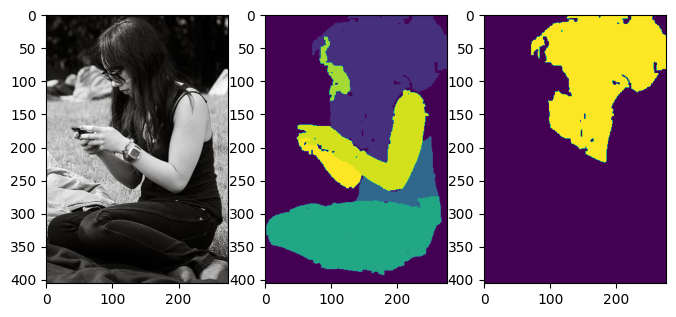

In [237]:
fig, ax = plt.subplots(1, 3, figsize = (8, 5))

ax[0].imshow(im)
ax[1].imshow(seg)
ax[2].imshow((seg==2))

#### Creating txt files for file tracking

In [201]:
images_dir = "data/DeepFashion_Multi/images"
segm_dir = "data/DeepFashion_Multi/segm"

print(f"Images Files: {len(os.listdir(images_dir))}")
print(f"Segm Files: {len(os.listdir(segm_dir))}")

segm_files = os.listdir(segm_dir)
im_files = os.listdir(images_dir)

segm_ids = [s.replace("_segm", "").replace(".png", "") for s in segm_files]
im_ids = [s.replace(".jpg", "") for s in im_files]

im_segm_inters = [id_seg for id_seg in segm_ids if id_seg in im_ids]
print(f"Intersection of Segm and Images Files: {len(im_segm_inters)}")

Images Files: 44096
Segm Files: 12701


Intersection of Segm and Images Files: 12701


In [ ]:
txt_path = "data/DeepFashion_Multi/DeepFashion_LIP/val_id.txt"

# with open(txt_path, "w") as f:
#     for id in im_segm_inters:
#         f.write(id + "\n")

#### Splitting into Training-Testing sets

In [214]:
import os
import shutil
from tqdm import tqdm

val_id_path = "data/DeepFashion_Multi/DeepFashion_LIP/val_id.txt"
with open(val_id_path, "r") as f:
    val_ids = f.readlines()

val_ids = [s.strip() for s in val_ids]
val_ids[:5]

['WOMEN-Sweaters-id_00005720-05_1_front',
 'WOMEN-Skirts-id_00007517-02_1_front',
 'WOMEN-Cardigans-id_00002121-11_4_full',
 'WOMEN-Blouses_Shirts-id_00004960-02_4_full',
 'WOMEN-Denim-id_00003347-06_1_front']

In [209]:
source_images_dir = "data/DeepFashion_Multi/images"
source_segm_dir = "data/DeepFashion_Multi/segm"

dest_images_dir = "data/DeepFashion_Multi/DeepFashion_LIP/val_images"
dest_segm_dir = "data/DeepFashion_Multi/DeepFashion_LIP/val_segmentation"

os.makedirs(dest_images_dir, exist_ok=True)
os.makedirs(dest_segm_dir, exist_ok=True)


In [ ]:
for id in tqdm(val_ids):

    file_im = f"{id}.jpg"
    file_segm = f"{id}_segm.png"

    source_im_path = os.path.join(source_images_dir, file_im)
    source_segm_path = os.path.join(source_segm_dir, file_segm)

    dest_im_path = os.path.join(dest_images_dir, file_im)
    dest_segm_path = os.path.join(dest_segm_dir, file_segm)

    # shutil.copy(source_im_path, dest_im_path)
    # shutil.copy(source_segm_path, dest_segm_path)

100%|██████████| 12701/12701 [00:03<00:00, 3333.59it/s]


#### Mapping DeepFashion to LIP classes

In [130]:
lip_classes = [
    "Bkg","Hat","Hair","Gloves","Sunglasses","Upper-clothes","Dress","Coat",
    "Socks","Pants","Jumpsuits","Scarf","Skirt","Face","Left-arm","Right-arm",
    "Left-leg","Right-leg","Left-shoe","Right-shoe"
]

lip_id_to_class = {i : lip_classes[i] for i in range(len(lip_classes))}
lip_id_to_class

{0: 'Bkg',
 1: 'Hat',
 2: 'Hair',
 3: 'Gloves',
 4: 'Sunglasses',
 5: 'Upper-clothes',
 6: 'Dress',
 7: 'Coat',
 8: 'Socks',
 9: 'Pants',
 10: 'Jumpsuits',
 11: 'Scarf',
 12: 'Skirt',
 13: 'Face',
 14: 'Left-arm',
 15: 'Right-arm',
 16: 'Left-leg',
 17: 'Right-leg',
 18: 'Left-shoe',
 19: 'Right-shoe'}

In [131]:
deepfashion_classes = [
    "Bkg","Top","Outer","Skirt","Dress","Pants","Leggings","Headwear",
    "Eyeglass","Neckwear","Belt","Footwear","Bag","Hair","Face","Skin",
    "Ring","Wrist wearing","Socks","Gloves", "Necklace", "Rompers", 
    "Earrings", "Tie"
]

deepfashion_id_to_class = {i : deepfashion_classes[i] for i in range(len(deepfashion_classes))}
deepfashion_id_to_class

{0: 'Bkg',
 1: 'Top',
 2: 'Outer',
 3: 'Skirt',
 4: 'Dress',
 5: 'Pants',
 6: 'Leggings',
 7: 'Headwear',
 8: 'Eyeglass',
 9: 'Neckwear',
 10: 'Belt',
 11: 'Footwear',
 12: 'Bag',
 13: 'Hair',
 14: 'Face',
 15: 'Skin',
 16: 'Ring',
 17: 'Wrist wearing',
 18: 'Socks',
 19: 'Gloves',
 20: 'Necklace',
 21: 'Rompers',
 22: 'Earrings',
 23: 'Tie'}

In [ ]:
deepfash_to_lip = {
    0 : 0,
    1 : 5,
    2 : 7,
    3 : 12,
    4 : 6,
    5 : 9,
    6 : 9,      #Leggings -> Pants
    7 : 1,      #Headwear -> Hat
    8 : 4,
    9 : 11,     #Neckwear -> Scarf
    10 : 9,     #Belt -> Pants
    11 : 18,    #Footwear -> left-shoe
    12 : 0,     #Bag -> background
    13 : 2,
    14 : 13,
    15 : 0,     #Skin -> background
    16 : 14,    #Ring -> left-arm
    17 : 14,    #Wrist wearing -> left-arm
    18 : 8,
    19 : 3,
    20 : 13,    #Necklace -> Face
    21 : 6,     #Rompers -> Dress
    22 : 13,    #Earrings -> Face
    23 : 5      #Tie -> Upper-clothes
}

In [230]:
import yaml

mapping_path = "/mnt/Self-Correction-Human-Parsing/data/DeepFashion_Multi/DeepFashion_LIP/mapping.yaml"
with open(mapping_path, "r") as f:
    info = yaml.safe_load(f)

mapping = info["mapping"]
mapping

{0: 0,
 1: 5,
 2: 7,
 3: 12,
 4: 6,
 5: 9,
 6: 9,
 7: 1,
 8: 4,
 9: 11,
 10: 9,
 11: 18,
 12: 0,
 13: 2,
 14: 13,
 15: 0,
 16: 14,
 17: 14,
 18: 8,
 19: 3,
 20: 13,
 21: 6,
 22: 13,
 23: 5}

#### Mapping Seg IDs

In [ ]:
max_old = max(mapping.keys())
lookup = np.arange(max_old+1)
for k, v in mapping.items():
    lookup[k] = v

lookup

In [ ]:
np.unique(seg_map, return_counts=True)

In [ ]:
seg_map = lookup[seg]
plt.imshow(seg_map)

### Visualize Results

In [117]:
# arch = "hrnet_schp_48_top"
# model_restore = 'log/hrnet_schp/hrnet_48_top/schp_2_checkpoint.pth.tar'

# arch = "hrnet_48_ocr"
# model_restore = 'log/hrnet_schp/hrnet_48_ocr/schp_2_checkpoint.pth.tar'

arch = "resnet101"
model_restore = 'log/schp_stand/schp_8_checkpoint.pth.tar'

do_mapping = True

num_classes = 20
im_name = None
# im_name = "241_190379"
#good_imgs = ["105452_429721"]
# im_name = "105452_429721"
# im_name = "11"


save_results_path = "imgs/"

import os
os.makedirs(save_results_path, exist_ok=True)

In [119]:
import yaml

if do_mapping:
    mapping_path = os.path.join(data_dir, "mapping.yaml")
    assert os.path.exists(mapping_path)
    with open(mapping_path, "r") as f:
        info = yaml.safe_load(f)

    mapping = info["mapping"]
    
    #Create a lookup array for mapping IDs
    max_old = max(mapping.keys())
    mapping_lookup = np.arange(max_old+1)
    for k, v in mapping.items():
        mapping_lookup[k] = v

In [102]:
import networks
import torchvision.transforms as transforms
import torch

model = networks.init_model(arch, num_classes=num_classes, pretrained=None)   #Initialize A-CE2P model (not pretrained)
state_dict = torch.load(model_restore)['state_dict']       #Loads pretrained weights
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:]  # remove `module.`
    new_state_dict[name] = v
model.load_state_dict(new_state_dict)
model.eval()

IMAGE_MEAN = model.mean
IMAGE_STD = model.std
INPUT_SPACE = model.input_space
print('image mean: {}'.format(IMAGE_MEAN))
print('image std: {}'.format(IMAGE_STD))
print('input space:{}'.format(INPUT_SPACE))
if INPUT_SPACE == 'BGR':
    print('BGR Transformation')
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=IMAGE_MEAN,
                                std=IMAGE_STD),

    ])

image mean: [0.406, 0.456, 0.485]
image std: [0.225, 0.224, 0.229]
input space:BGR
BGR Transformation


In [122]:
from datasets.datasets import LIPDataValSet
from torch.utils import data
from tqdm import tqdm
import torch

input_size = [128, 128]

#data_dir = "./data/LIP"
data_dir = "./data/DeepFashion_Multi/DeepFashion_LIP"

lip_test_dataset = LIPDataValSet(data_dir, 'val', 
                                 crop_size=input_size, 
                                 transform=transform, 
                                 flip=True)

testloader = data.DataLoader(lip_test_dataset, 
                             batch_size=1, 
                             shuffle=False, 
                             pin_memory=True)


if im_name is None:
    target_batch = np.random.choice(np.arange(100), 1)
    print(target_batch)

for num, batch in enumerate(tqdm(testloader)):

    image, meta = batch

    if im_name is None and num == target_batch:
        im_name = meta["name"][0]
        break

    elif meta["name"][0] == im_name:
        break


c = meta["center"].numpy()[0]
s = meta["scale"].numpy()[0]
w = meta["width"].numpy()[0]
h = meta["height"].numpy()[0]
print(im_name)
        

[4]


  0%|          | 4/12701 [00:00<05:18, 39.86it/s]

WOMEN-Denim-id_00003347-06_1_front


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


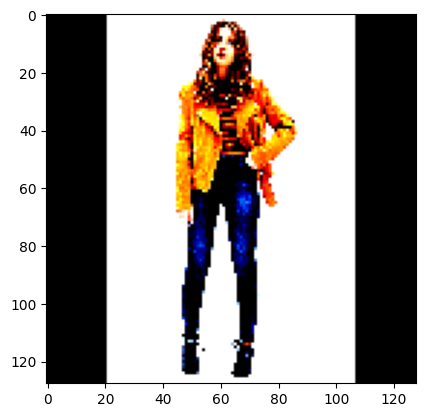

In [123]:
import matplotlib.pyplot as plt

img_np = image[0][0].permute([1, 2, 0]).numpy()[:, :, ::-1]
plt.imshow(img_np)

In [124]:
from utils.transforms import BGR2RGB_transform
from utils.transforms import transform_parsing
from PIL import Image as PILImage
from evaluate import multi_scale_testing
from evaluate import get_palette

palette = get_palette(20)
parsing, _ = multi_scale_testing(model, image,
                                 crop_size = input_size,
                                 flip = True,
                                 multi_scales=[1])



parsing_result = transform_parsing(parsing, c, s, w, h, input_size)
parsing_result_path = os.path.join(save_results_path, im_name + '.png')
output_im = PILImage.fromarray(np.asarray(parsing_result, dtype=np.uint8))
output_im.putpalette(palette)
output_im.save(parsing_result_path)

In [125]:
pars_im = PILImage.fromarray(np.array(parsing, dtype=np.uint8))
pars_im.putpalette(palette)

In [126]:
import matplotlib.patches as mpatches

# Get palette and prepare Legend
def get_palette(num_cls):
    n = num_cls
    palette = [0] * (n * 3)
    for j in range(n):
        lab = j
        i = 0
        while lab:
            palette[j * 3 + 0] |= (((lab >> 0) & 1) << (7 - i))
            palette[j * 3 + 1] |= (((lab >> 1) & 1) << (7 - i))
            palette[j * 3 + 2] |= (((lab >> 2) & 1) << (7 - i))
            i += 1
            lab >>= 3
    return palette

lip_classes = [
    "Background","Hat","Hair","Glove","Sunglasses","Upper-clothes","Dress","Coat",
    "Socks","Pants","Jumpsuits","Scarf","Skirt","Face","Left-arm","Right-arm",
    "Left-leg","Right-leg","Left-shoe","Right-shoe"
]
num_classes = len(lip_classes)

palette = get_palette(num_classes)
colors = np.array(palette, dtype=np.float32).reshape(-1, 3) / 255.0

patches = [mpatches.Patch(color=colors[i], label=lip_classes[i])
           for i in range(num_classes)]

In [127]:
def resize_with_padding(im, desired_size=128):
    # original size
    old_size = im.size  # (width, height)

    # ratio for scaling
    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])

    # resize image
    im_resized = im.resize(new_size, PILImage.BILINEAR)

    # create new image and paste resized on the center
    new_im = PILImage.new("RGB", (desired_size, desired_size), (0, 0, 0))  # black padding
    paste_position = ((desired_size - new_size[0]) // 2,
                      (desired_size - new_size[1]) // 2)
    new_im.paste(im_resized, paste_position)

    return new_im

In [128]:
im_name

'WOMEN-Denim-id_00003347-06_1_front'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


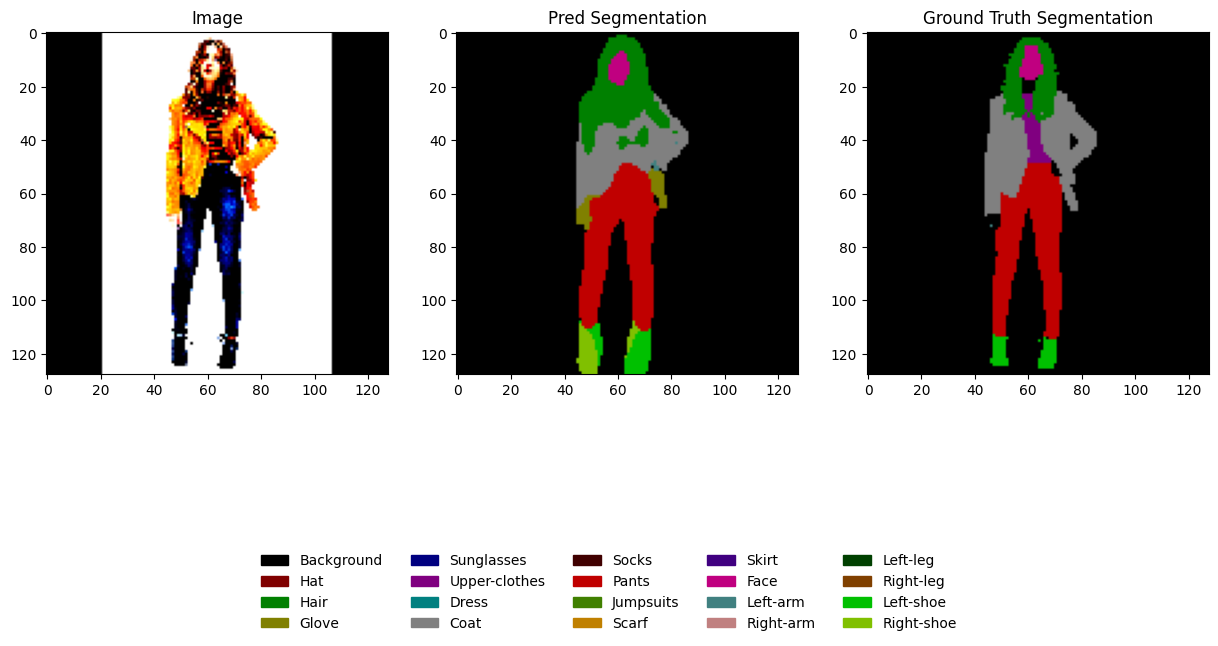

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- your figure ---
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

ax[0].imshow(image[0][0].permute([1, 2, 0]).numpy()[:, :, ::-1])
ax[1].imshow(pars_im)

ax[0].set_title("Image")
ax[1].set_title("Pred Segmentation")

#Get Ground truth
val_seg_dir = os.path.join(data_dir, "val_segmentations")
gt_seg_path = os.path.join(val_seg_dir, f"{im_name}.png")
if not os.path.exists(gt_seg_path):
    gt_seg_path = os.path.join(val_seg_dir, f"{im_name}_segm.png")

gt_seg = np.array(PILImage.open(gt_seg_path))
if do_mapping:
    gt_seg = mapping_lookup[gt_seg]

gt_seg_im = PILImage.fromarray(gt_seg.astype("uint8"))
gt_seg_im.putpalette(palette)
gt_seg_im = resize_with_padding(gt_seg_im)

ax[2].imshow(gt_seg_im)
ax[2].set_title("Ground Truth Segmentation")


#Plotting Legend
ncol = math.ceil(num_classes / 4)  # 3 rows
fig.legend(handles=patches,
           loc="lower center",
           ncol=ncol,
           frameon=False,
           bbox_to_anchor=(0.5, -0.02))  # push a bit below the axes

# leave space for the legend
plt.subplots_adjust(bottom=0.18)
plt.show()


In [132]:
gt_seg.dtype

dtype('int64')

In [136]:
gt_seg = gt_seg.astype("uint8")

gt_seg_im = PILImage.fromarray(gt_seg)

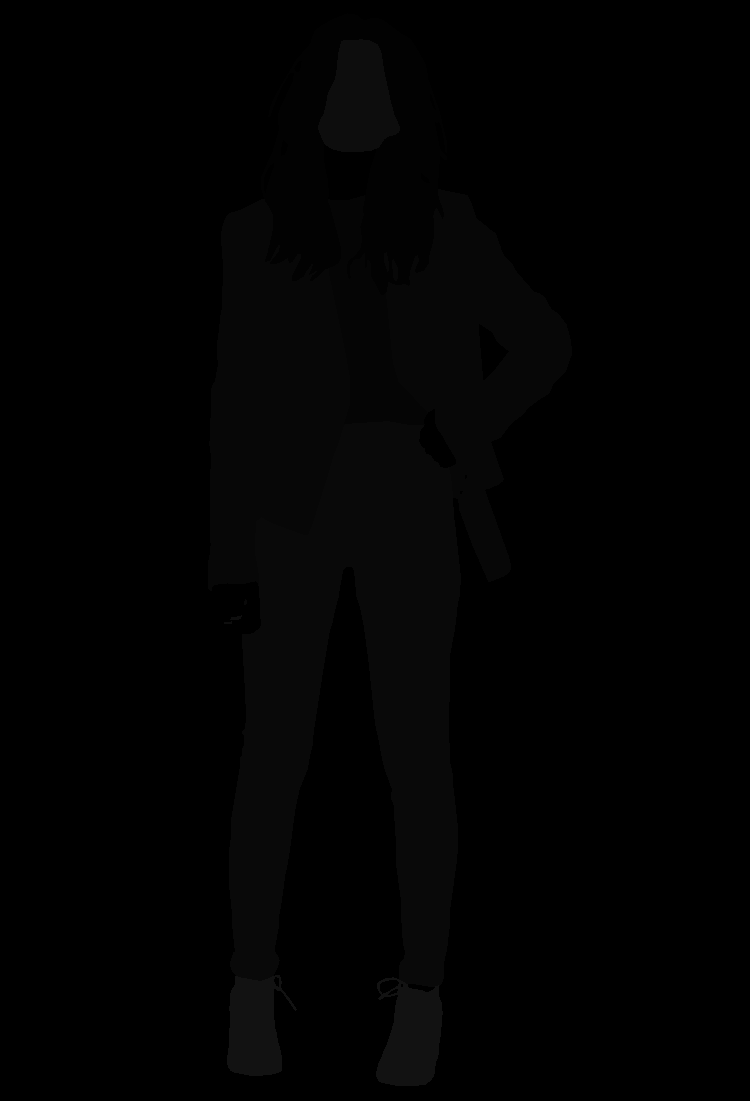

In [137]:
gt_seg_im

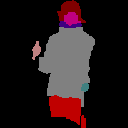

In [328]:
import cv2
from utils.transforms import get_affine_transform

def _box2cs(box, crop_size=[128, 128]):
    x, y, w, h = box[:4]
    return _xywh2cs(x, y, w, h, crop_size)

def _xywh2cs(x, y, w, h, crop_size):

    aspect_ratio = crop_size[1] * 1.0 / crop_size[0]

    center = np.zeros((2), dtype=np.float32)
    center[0] = x + w * 0.5
    center[1] = y + h * 0.5
    if w > aspect_ratio * h:
        h = w * 1.0 / aspect_ratio
    elif w < aspect_ratio * h:
        w = h * aspect_ratio
    scale = np.array([w * 1.0, h * 1.0], dtype=np.float32)

    return center, scale

crop_size = [128, 128]

im = cv2.imread(gt_seg_path, cv2.IMREAD_COLOR)
h, w, _ = im.shape
# Get person center and scale
person_center, s = _box2cs([0, 0, w - 1, h - 1])
r = 0
trans = get_affine_transform(person_center, s, r, crop_size)
input = cv2.warpAffine(
    im,
    trans,
    (int(crop_size[1]), int(crop_size[0])),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0))

In [334]:
input.shape

(128, 128, 3)

In [336]:
gt_im = PILImage.fromarray(np.array(input, dtype=np.uint8), mode="P")
gt_im.putpalette(palette)
gt_im

ValueError: Too many dimensions: 3 > 2.

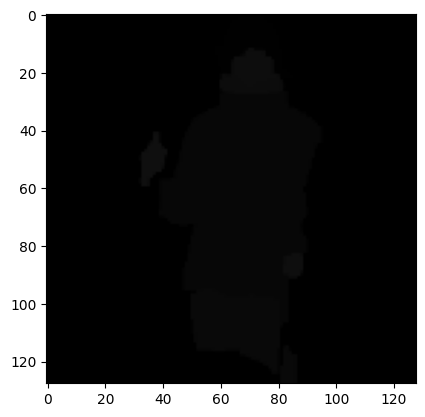

In [329]:
plt.imshow(input)